<div align ='center'><h1>Machine Learning<h1></div>
<div align ='center'><h2>Assignment1<h2></div>
Student name: Ngoc Bao Vy Le<br>
Student ID: s3828276<br>
Date: 10/04/2022

# Objective
Develop a ML model to predict if the patients will develop a Sepssis in the period of their stays in the ICU, based on the given variables.



# Tasks  
<li>Data Preprocessing
<li>Developing Model (Logistic Regression):
     1. Linear Classification 
     2. Non-Linear Classification
     3. Non-Linear Classification with Regularisation   
<li>Ultimate Judgment
<li>Prediction

# 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer, f1_score, plot_confusion_matrix

from joblib import dump,load


In [2]:
patients = pd.read_csv("Paitients_Files_Train.csv")
patients.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Data Description

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose
 |
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)    
|
| SK              | Attribute 4      | Blood Work Result-2 (mm) 
|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)
|                                                                                               
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2
|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)                                                                                                                                               |
| Age              | Attribute 8      |    patients age  (years)                                                                                                                                             |
| Insurance | N/A     | If a patient holds a valid insurance card
|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

In [3]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


<i><u>Observation:</u></i><br>
<li>The data has 599 entries and 11 columns
<li>There is no missing value in the data set
<li>ID and Sepssis is object
<li>PRG, PL, PR, SK, TS, Age and Insurance have data type as int
<li> M11 and BD2 have data type as float

In [4]:
# checking unique values in Sepssis(target)
patients.iloc[:,-1].unique()

array(['Positive', 'Negative'], dtype=object)

The values of Sepssis are in character. They are needed to be relabel to [0-1]

In [5]:
# Encoding Sepssis(target). Transform values to [0-1]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
patients['Sepssis_encoded'] = labelencoder.fit_transform(patients['Sepssis'])
patients.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,Sepssis_encoded
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,1


In [6]:
# check unique values of Sepssis encoded
patients['Sepssis_encoded'].unique()

array([1, 0])

<i><u>Observation:</u></i><br>
After label encoding for target(Sepssis) , Positive is 1 and Negative is 0 now

<b>Drop ID, Insurance and Sepssis

Since ID and Insurance are not related to Sepssis condition. We drop them<br>
We also drop the redundant 'Sepssis' then rename Sepssis_encoded to Sepsis

In [7]:
# drop ID and insurance
data = patients.drop(["ID", "Insurance", 'Sepssis'], axis=1)
data.rename(columns={'Sepssis_encoded': 'Sepsis'}, inplace=True )
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b><i>Under the assumption that the data has no error. It can be concluded that it is clean and ready for EDA

# 2. Exploratory Data Analysis(EDA)

### Statistic description

In [8]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Distribution

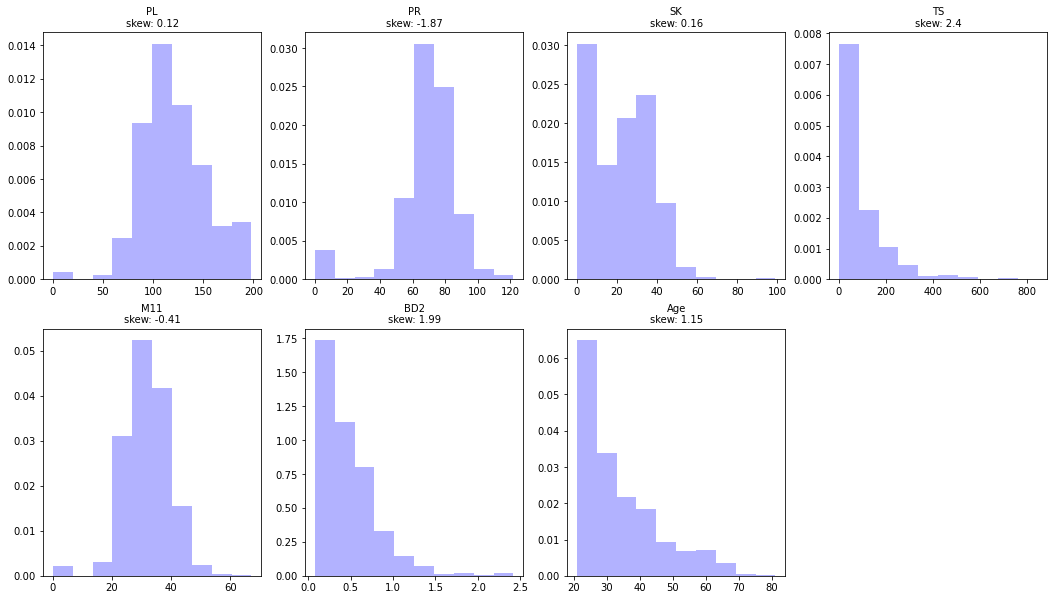

In [9]:
skewValue = data.skew(axis=0)[1:-1]
plt.figure(figsize=(18,10))
for i, col in enumerate(data.columns[1:-1]):
    plt.subplot(2,4, i+1)
    plt.hist(data[col], alpha= 0.3, color='b', density=True, bins=10)
    plt.title(col + '\n' + 'skew: ' + str(skewValue[i].round(2)), size =10)  

<i><u>Observation:</u></i><br>
    <li> PR, TS, BD2, and Age  are heavily skewed 
    <li> Attributes have different range. For instance, PL[0-200], TS[0-800] or DB2[0-2.42]
    <li>PL, PR, M11 have outliers in the lower range
    <li>Sk, TS have outliers in the upper range

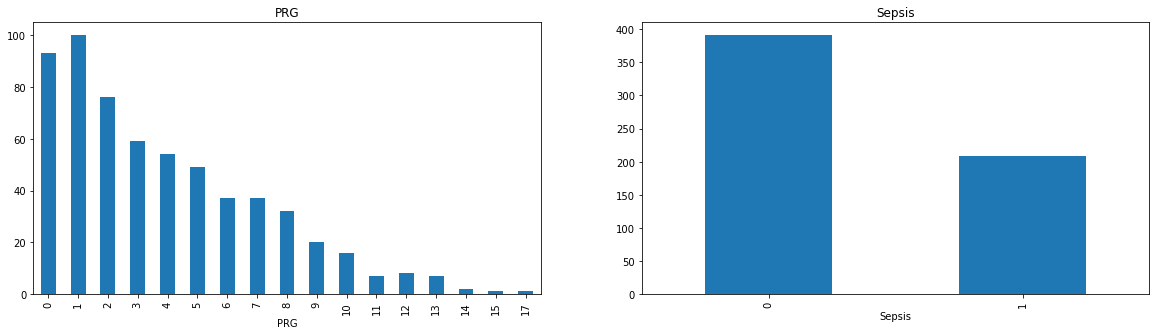

In [10]:
categorical_variables = ['PRG', 'Sepsis']
plt.figure(figsize=(20,5))
for i, c in enumerate(categorical_variables):
    plt.subplot(1,2,i+1)
    data.groupby(c).size().plot.bar()  
    plt.title(c)

<i><u>Observation:</u></i><br>
    <li>Target variable Sepsis is distributed around 25% (class 1) and 75% (class 0). This indicates that there are imbalanced distribution of classes
    <li>The ordinal variable PRG has the right skew which more obsevations in the lower level of PRG
    

### Relationship between variables toward Sepssis

In [11]:
# corelation in ascending order
corr = data.corr()
corr['Sepsis'].sort_values(ascending=False)

Sepsis    1.000000
PL        0.449719
M11       0.315894
Age       0.210234
PRG       0.207115
BD2       0.181561
TS        0.145892
SK        0.075585
PR        0.061086
Name: Sepsis, dtype: float64

<i><u>Observation:</u></i><br>
Most of the variables have a weak correlations to target variable(Sepsis)

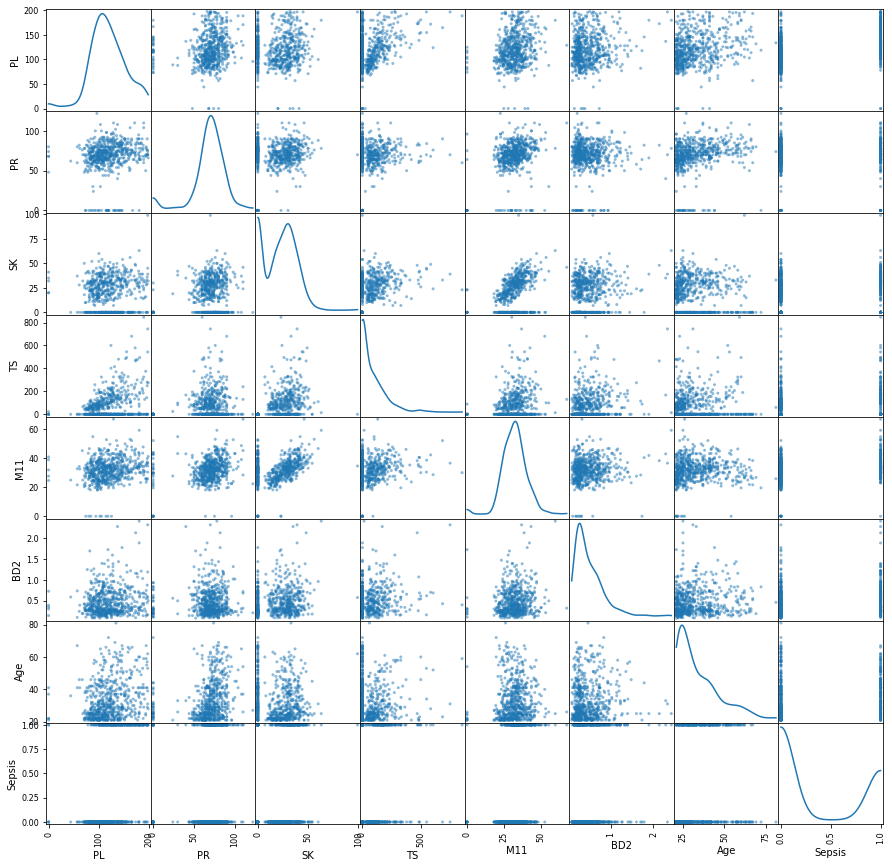

In [12]:

scatter_matrix(data.iloc[:, 1:], figsize =[15,15], diagonal='kde')
plt.show()

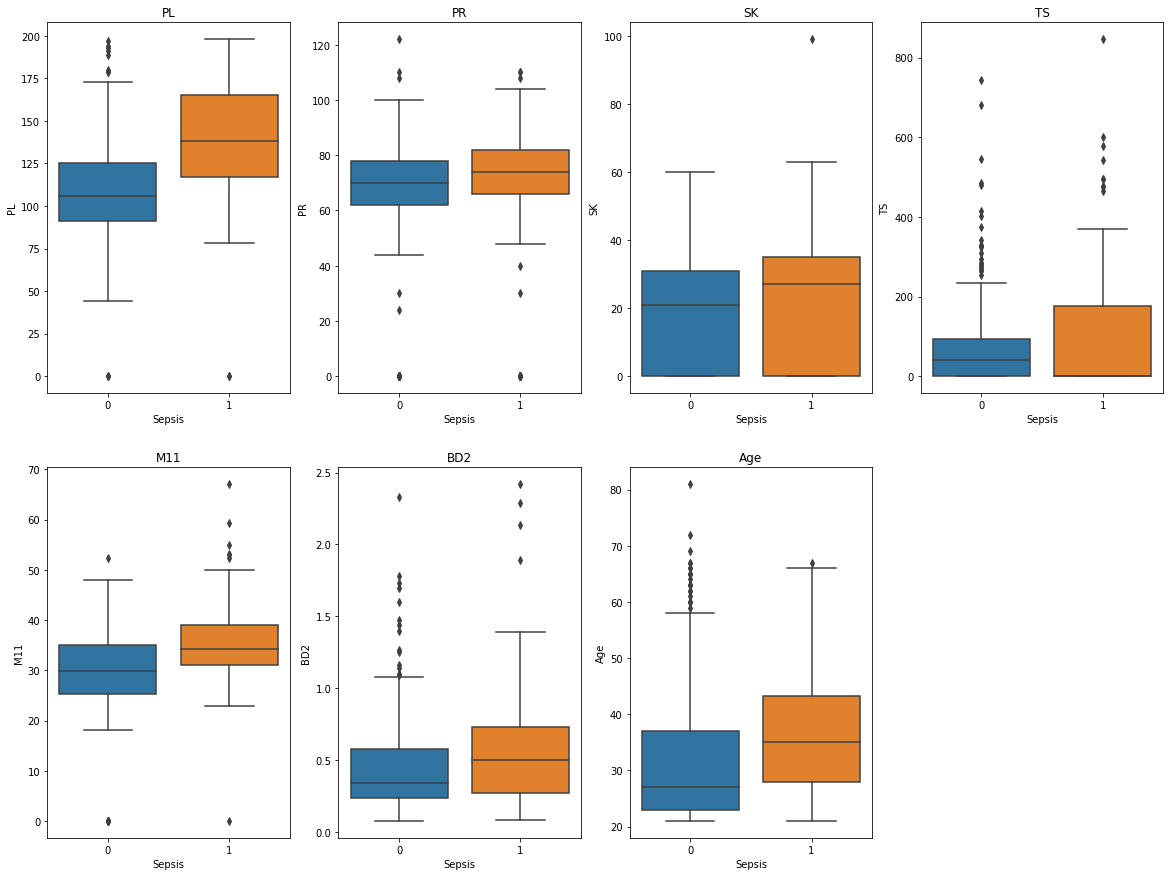

In [13]:

plt.figure(figsize =(20,15))
i =1
for col in data.drop([ 'PRG','Sepsis'], axis=1).columns:
    plt.subplot(2,4, i)
    i=i+1
    sns.boxplot(x='Sepsis', y=col, data=data)
    plt.title(col)

<b>Observation:</b> <br>
<li>There are alot outliers in the data set
<li>Data distribution of 2 classes are similar such as IQR, median, whistkers

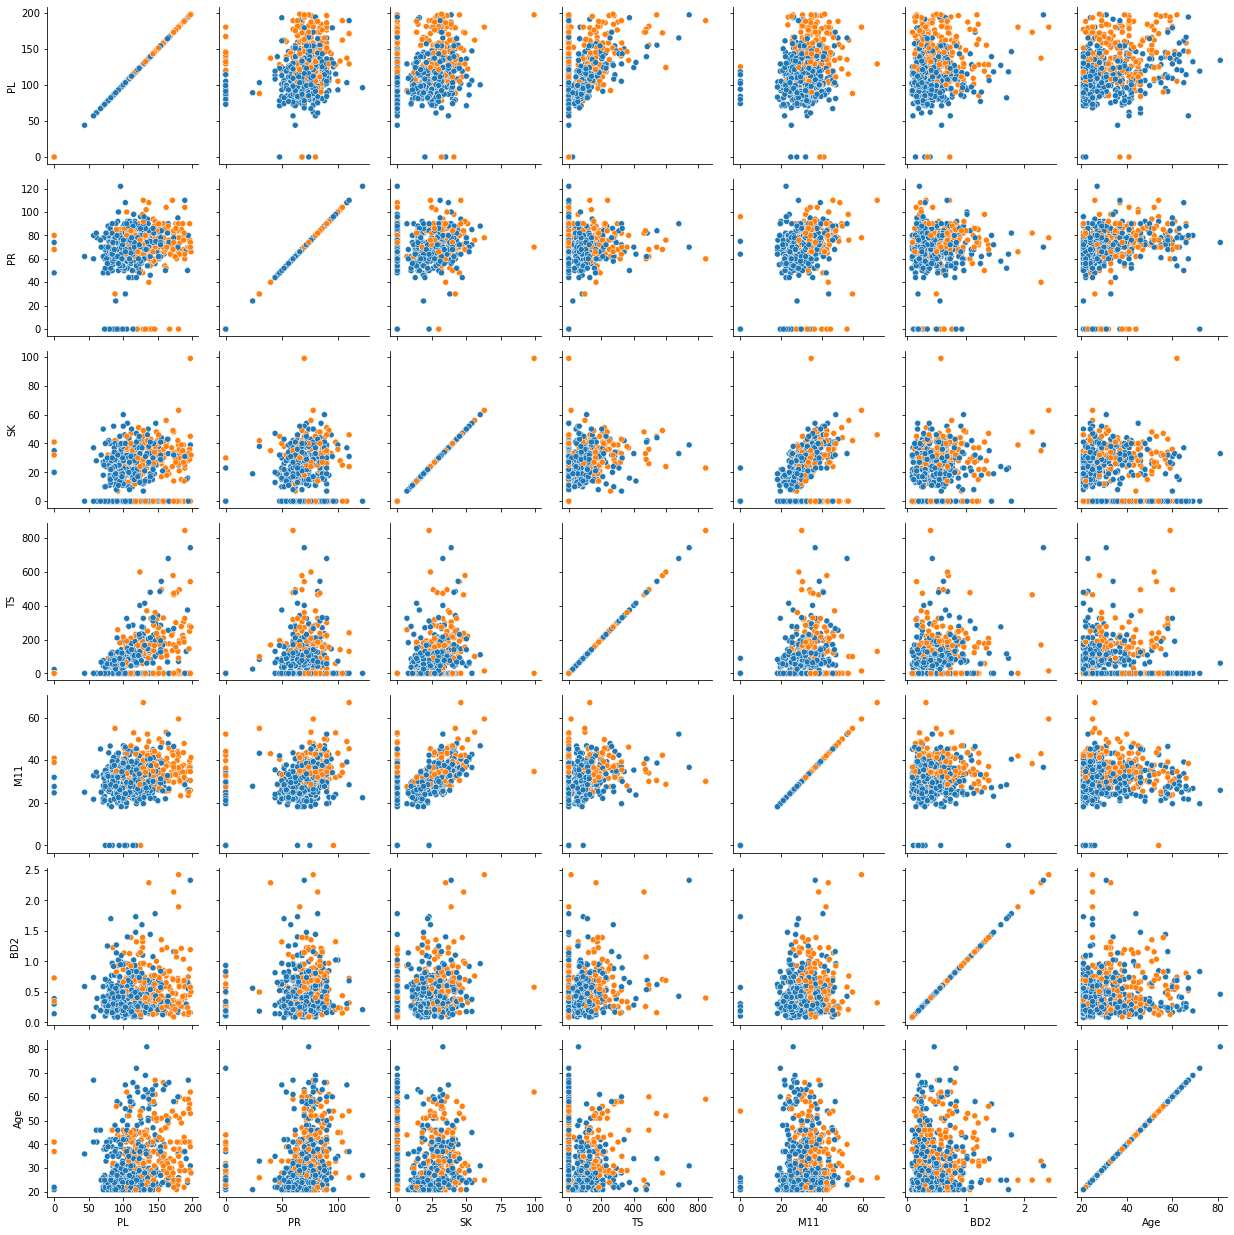

In [14]:
# correlations between attributes by sepsis
g = sns.PairGrid(data, vars= data.drop(['PRG','Sepsis'], axis=1).columns, hue='Sepsis')
g.map(sns.scatterplot)
plt.show()

<i><u>Observation:</u></i> <br>
    <li>There are alot of overlaps between two classes of Sepsis in every variables. It is gonna be very difficult to distinguish the target labels
    <li>Non-Linear decision boundary might be able to seperate two classes

### Processing Outliers
In this task, we replace outliers according to each class to obserse the change in data distribution<br>
The ouliers are replaced coresponding to the mean of each class 

<b>Extract outliers

<ipython-input-15-7491aa944775>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,9, i+1 ,visible=False)
<ipython-input-15-7491aa944775>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,9, i+1 ,visible=False)
<ipython-input-15-7491aa944775>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

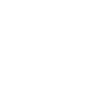

In [15]:
# get the outliers values and their indexes


# create dictionaries to store values and indexes of outliers
outliers_by_column  = {}
indices_by_column = {}

i=0

plt.figure(figsize=(1,1))


for col in data.drop(["Sepsis", "PRG"], axis=1).columns:
    b ={}
    indices = {}
    
    for label in sorted(data["Sepsis"].unique()):
        outliers_class_0 =[]
        outliers_class_1=[]
       
        plt.subplot(1,9, i+1 ,visible=False)
        
       # Extract outliers for each class from each columns
        _, a = data[data['Sepsis'] == label].boxplot(column = col, sym ='k.', return_type = 'both')        
        outliers = [flier.get_ydata() for flier in a['fliers']]      
    
    
        # process class 0
        if label == 0:
            outliers_class_0 =  outliers[0]
            b['outliers_class_0'] = list(set(outliers_class_0))# append outlier values
            if len(outliers_class_0) >0: # if there are outliers
                condition = (data["Sepsis"] == label) & data[col].isin(list(set(outliers_class_0))) # set condition to get index
                indices['outliers_class_0'] = data[condition].index # append index
            #else:
                #indices['outliers_class_0'] = "N" # if there is no outlier, append string N
            
        # process class 1    
        else:
            outliers_class_1 =  outliers[0]
            b['outliers_class_1'] = list(set(outliers_class_1)) # append outlier values 
            if len(outliers_class_1) >0:# if there are outliers
                condition = (data["Sepsis"] == label) & data[col].isin(list(set(outliers_class_1)))# set condition to get index
                indices['outliers_class_1'] = data[condition].index # append index
            #else:
                #indices['outliers_class_1'] = "N" # if there is no outlier, append string N
            
                 
    outliers_by_column[col] = b  # add outlier values in dict for each column
    indices_by_column[col] = indices  #add index in dict for each column
    
    #print(col)
    #print(outliers_by_column[col])
    #print()
    
    i = i+1

In [16]:
for col in outliers_by_column:
    print(col)
    for label , value in outliers_by_column[col].items():
        print(label, value)
    print()


PL
outliers_class_0 [0, 193, 194, 197, 179, 180, 189, 191]
outliers_class_1 [0]

PR
outliers_class_0 [0, 108, 110, 24, 122, 30]
outliers_class_1 [0, 40, 108, 110, 30]

SK
outliers_class_0 []
outliers_class_1 [99]

TS
outliers_class_0 [265, 270, 402, 275, 278, 284, 285, 415, 545, 293, 680, 310, 325, 326, 330, 342, 480, 485, 744, 375, 255]
outliers_class_1 [579, 846, 495, 465, 600, 474, 478, 543]

M11
outliers_class_0 [0.0, 52.3]
outliers_class_1 [0.0, 67.1, 52.3, 53.2, 52.9, 55.0, 59.4]

BD2
outliers_class_0 [1.441, 1.4, 2.329, 1.101, 1.781, 1.476, 1.731, 1.268, 1.6, 1.095, 1.138, 1.251, 1.159, 1.699]
outliers_class_1 [1.893, 2.288, 2.137, 2.42]

Age
outliers_class_0 [64, 65, 66, 67, 69, 72, 81, 59, 60, 61, 62, 63]
outliers_class_1 [67]



In [17]:
for col in indices_by_column:
    print(col)
    for label , value in indices_by_column[col].items():
        print(label, value)
    print()


PL
outliers_class_0 Int64Index([40, 75, 182, 212, 228, 258, 260, 327, 342, 489, 549], dtype='int64')
outliers_class_1 Int64Index([349, 502], dtype='int64')

PR
outliers_class_0 Int64Index([  7,  18,  49,  60,  81, 106, 172, 222, 336, 347, 362, 426, 430,
            453, 494, 522, 533, 549, 589, 597],
           dtype='int64')
outliers_class_1 Int64Index([  4,  15,  43,  78,  84, 125, 177, 193, 261, 266, 269, 300, 332,
            357, 435, 468, 484, 535],
           dtype='int64')

SK
outliers_class_1 Int64Index([579], dtype='int64')

TS
outliers_class_0 Int64Index([ 54,  73, 139, 144, 153, 162, 228, 247, 248, 258, 279, 286, 335,
            364, 392, 395, 412, 486, 487, 519, 574],
           dtype='int64')
outliers_class_1 Int64Index([8, 13, 111, 186, 220, 370, 409, 415, 584], dtype='int64')

M11
outliers_class_0 Int64Index([49, 60, 81, 145, 247, 371, 426, 494, 522], dtype='int64')
outliers_class_1 Int64Index([9, 120, 125, 177, 193, 303, 445], dtype='int64')

BD2
outliers_class_0 Int6

<b>Replace outliers by mean according to each class


In [18]:
# create a new data frame 
df=data.copy()

In [19]:
for col in indices_by_column:
    
    for label in indices_by_column[col]:
        
        # class 0
        if label == 'outliers_class_0':          
            df.loc[indices_by_column[col][label], col] = np.nan # change values to nan
            condition = df['Sepsis'] == 0 
            df.fillna(value = df.groupby('Sepsis').mean().loc[0, col], inplace = True)  # replace by mean
                
         # class 1   
        elif label =='outliers_class_1':
            df.loc[indices_by_column[col][label], col] = np.nan# change values to nan
            condition = df['Sepsis'] == 1
            df.fillna(value = df.groupby('Sepsis').mean().loc[1, col], inplace = True)  # replace by mean
            
        

<b>Distribution

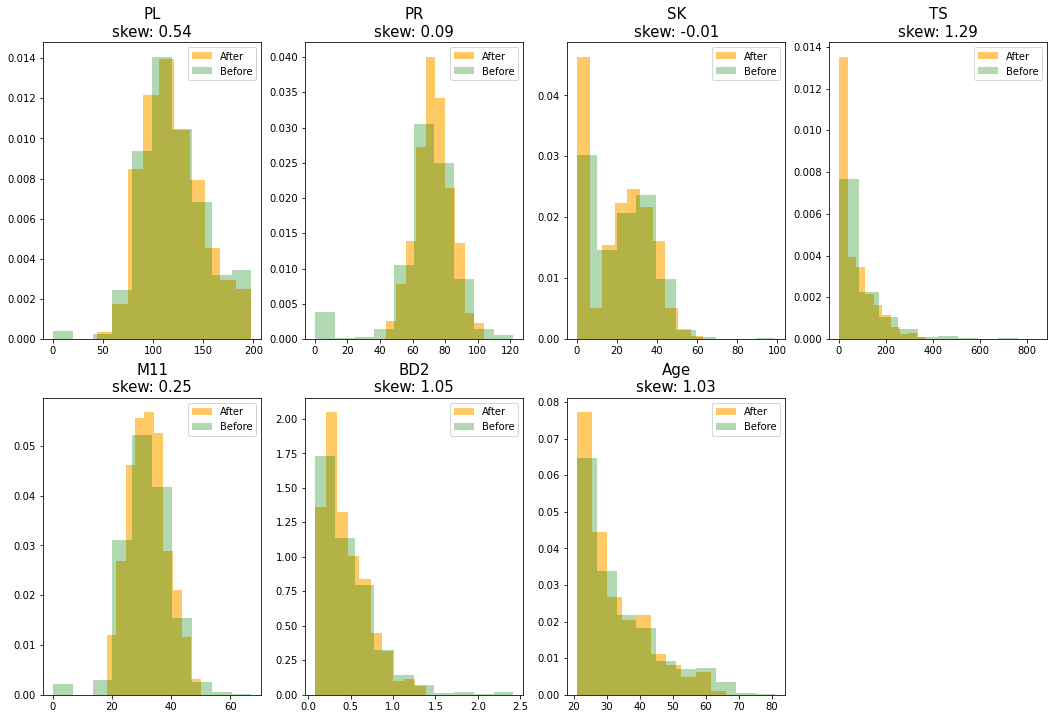

In [20]:
skewValue = df.skew(axis=0)[1:-1]
plt.figure(figsize=(18,12))
for i, col in enumerate(df.columns[1:-1]):
    plt.subplot(2,4, i+1)
    plt.hist(df[col], alpha= 0.6, color='orange', density=True, bins=10)
    plt.hist(data[col], alpha= 0.3, color='g', density=True, bins=10)
    plt.title(col + '\n' + 'skew: ' + str(skewValue[i].round(2)), size =15)
    plt.legend(['After', 'Before'])

<b><i><u>Observation:</u></i></b> There is no ouliers after processing. The distributions of 2 data sets are similiar since the have the similar shape and skeness

### Relationship between variables toward Sepsis

In [21]:
corr_df = df.corr()['Sepsis'].sort_values(ascending=False)
corr_data =data.corr()['Sepsis'].sort_values(ascending=False)
pd.concat({'before':corr_data, 'after':corr_df}, axis=1)

,before,after
Sepsis,1.000000,1.000000
PL,0.449719,0.527065
M11,0.315894,0.315431
Age,0.210234,0.329638
PRG,0.207115,0.207115
BD2,0.181561,0.246500
TS,0.145892,0.204619
SK,0.075585,0.065888
PR,0.061086,0.197868


<i><u>Observation:</u></i> 
<li>small increases in correlations of PL, Age, BD2 to Sepsis
<li>a jump from 0.06 to 0.198 in correlation of PR to Sepsis   
<li>small decreases in correlations of M11 and SK to Sepsis<br>
The corelations of dependent attributes are still weak after processed outliers. PL still has a morderate positive corelation to Sepsis

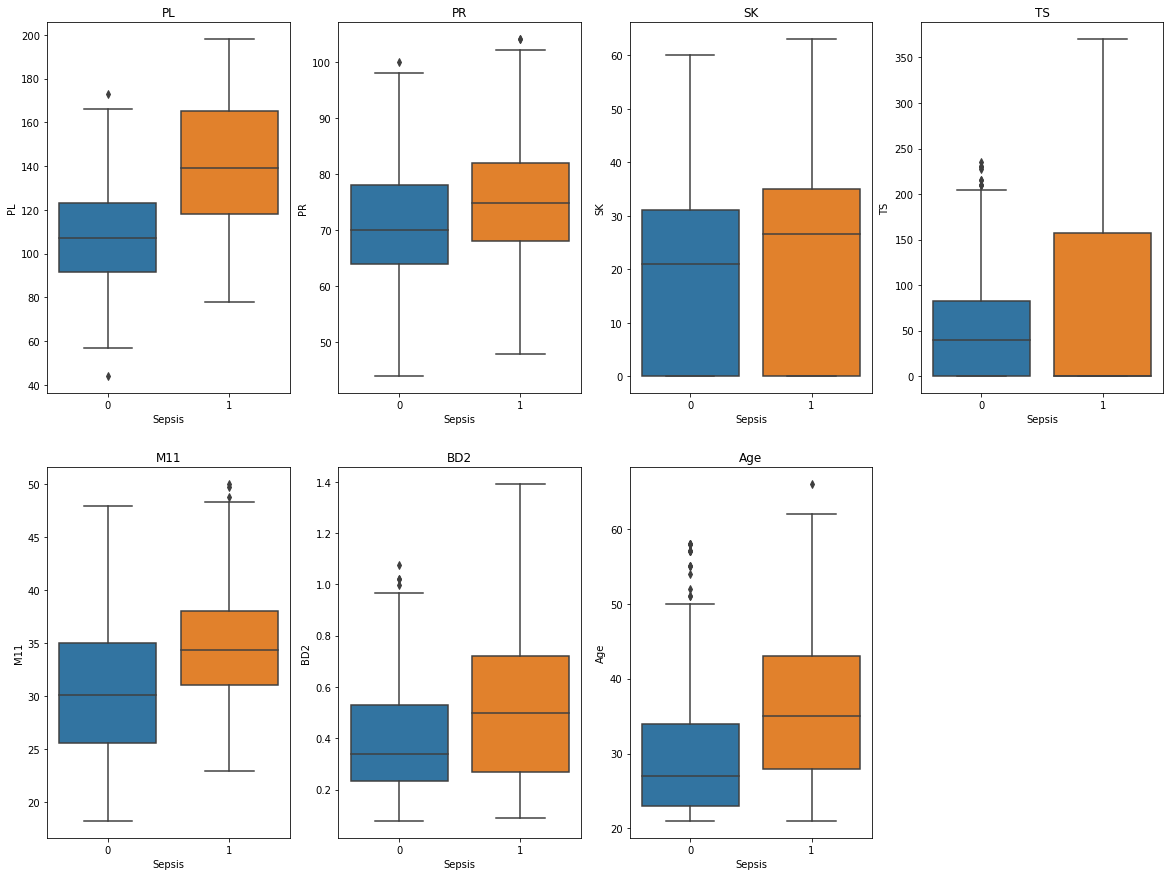

In [22]:
plt.figure(figsize =(20,15))
i =1
for col in df.drop([ 'PRG','Sepsis'], axis=1).columns:
    plt.subplot(2,4, i)
    i=i+1
    sns.boxplot(x='Sepsis', y=col, data=df)
    plt.title(col)

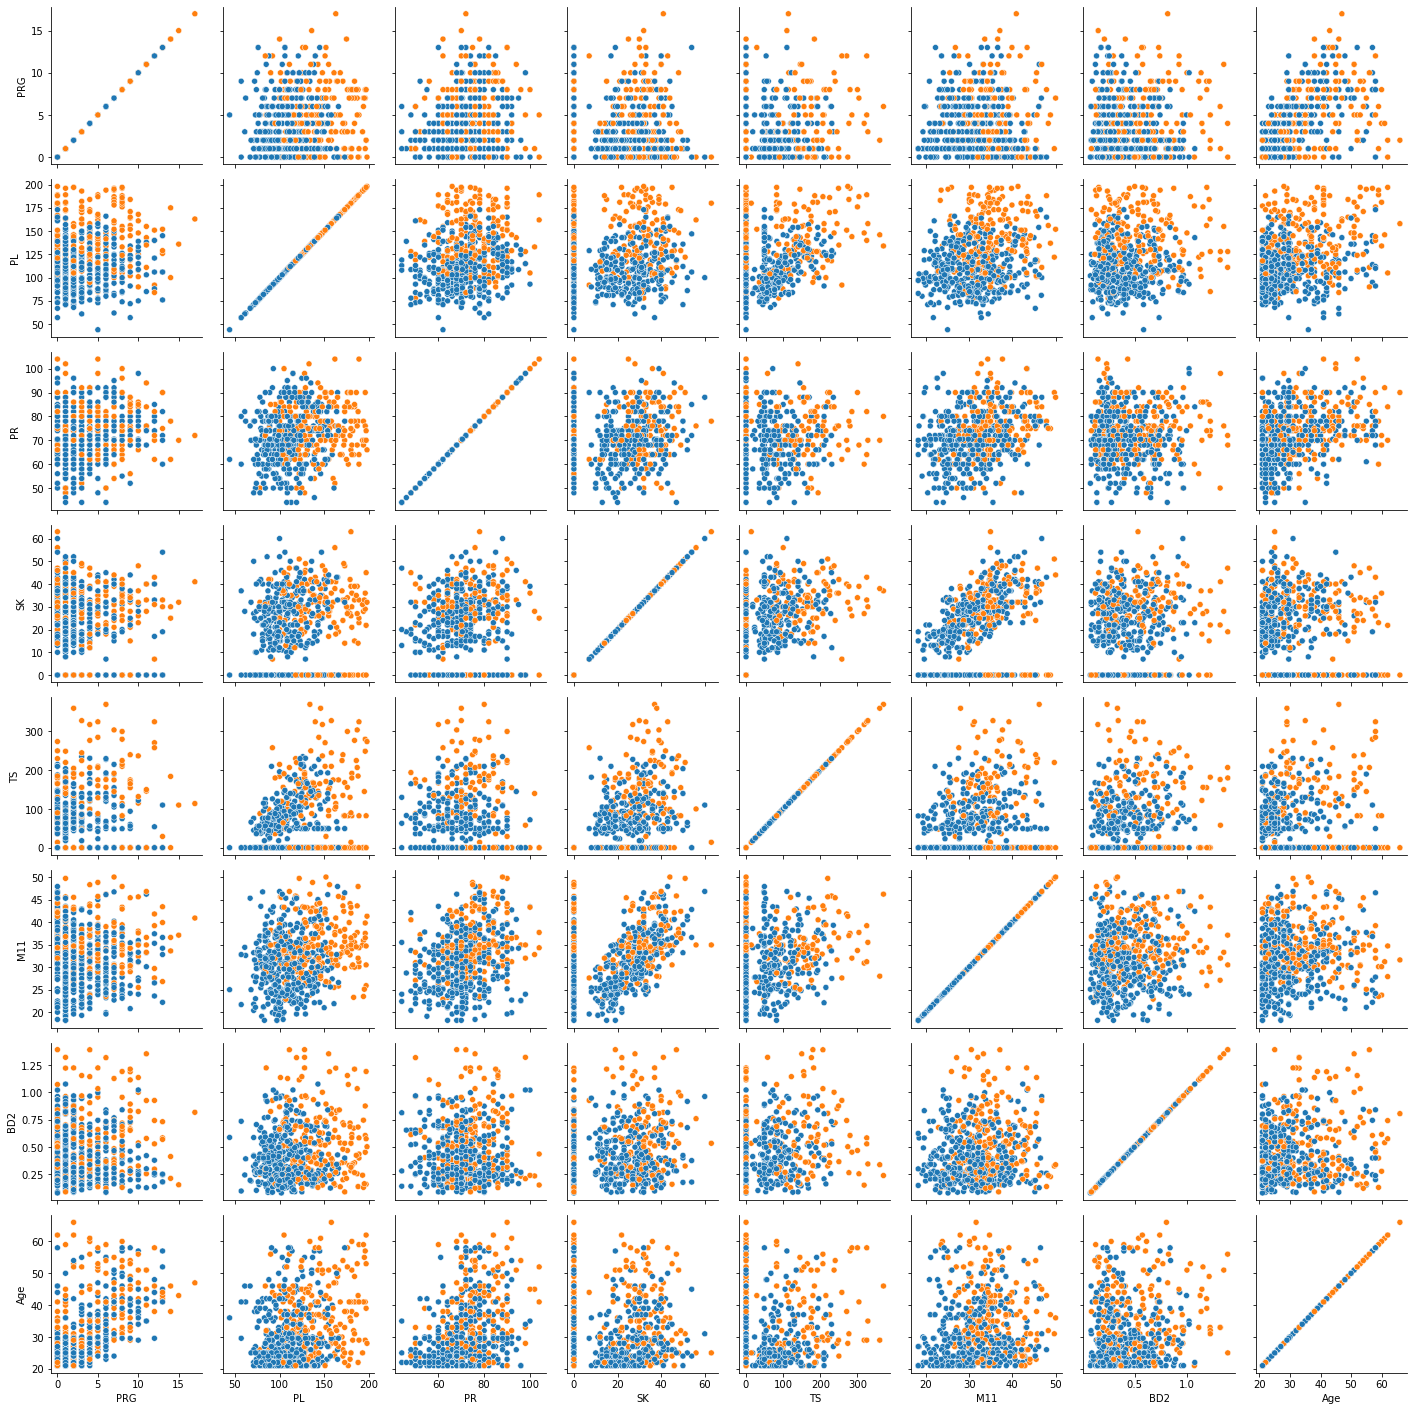

In [23]:
# correlation between attributes by Sepsis
g = sns.PairGrid(df, vars=df.drop(['Sepsis'], axis=1).columns, hue='Sepsis')
g.map(sns.scatterplot)
plt.show()

<i><u>Observation:</u></i> 
Classes are distingushed a bit clearer in the processed data than the unprocessed onces.<br>
Non-Linear decision boundary might be able to seperate two classes

# 3. Developing Model

The target class in the data set is biased to one class(class 0)<br>
Using macro-averaged, f1_score for performance measurement <br>

We will use data with and without processed outliers to train the base model. We will then compare their performances. <br>
If the perfomance of data with proccessed outliers is better than the one without, we will use it to develop other models.<br>

The expectations are:
    <li>similar performance in both classes  
    <li>The prediction is around 0.75 for f1-score

In [24]:
# create function to get f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)  
    train_f1 =f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro') 
    
    return train_f1.round(4), val_f1.round(4)

# Experiment 1:  Linear Classification -Logistic Regression
In this task, We will use data with and without processed outliers to train the model and compare their performances. <br>
We will base on the F1_scores to consider which data to train the other complex models.
For validation we use:
<li>Hold out
<li>kfold-cross validation (10 folds)

### 1. Data with unproccessed outliers

### Part A: Holdout validation

<b>Extract validation data from train data

In [25]:
train_data, val_data = train_test_split(data, test_size=0.2, shuffle=True,random_state=0)
print("train data:", train_data.shape, "|", 'validation datata:',  val_data.shape)

train data: (479, 9) | validation datata: (120, 9)


In [26]:
#data
 # Train
X_train = train_data.iloc[:, 0:-1]
Y_train = train_data.iloc[:, -1]
 # Validation
X_validation = val_data.iloc[:, 0:-1]
Y_validation = val_data.iloc[:, -1]


<b>Feature Scaling (Min_max)

In [27]:
# scaling train, validation 

X_train_scaled = X_train.copy()
minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:10])
X_train_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:10])


X_validation_scaled = X_validation.copy()
minmaxscaler = MinMaxScaler().fit(X_validation_scaled.iloc[:, 0:10])
X_validation_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_validation.iloc[:, 0:10])


<b> Inspecting the scaling

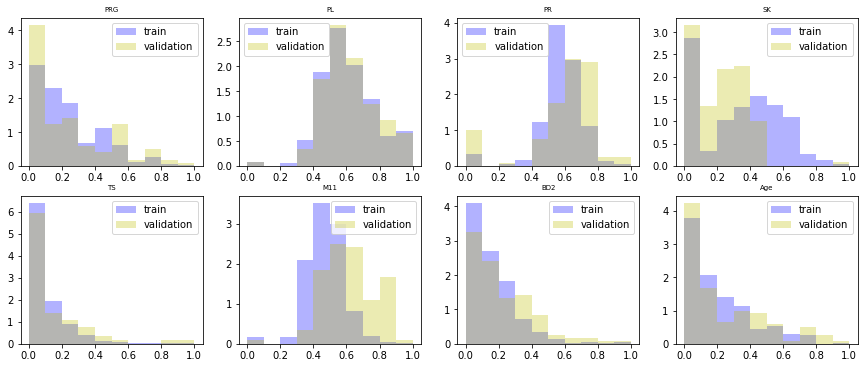

In [28]:
plt.figure(figsize=(15,6))
for i, col in enumerate(X_train.columns):
    plt.subplot(2,4, i+1)
    plt.hist(X_train_scaled[col], alpha= 0.3, color='b', density=True, bins=10)
    plt.hist(X_validation_scaled[col], alpha= 0.3, color='y', density=True, bins=10)
    plt.legend(['train', 'validation'])
    plt.title(col, size =7) 
    

<i><u>Observation:</u><i> <br>
    <li>Train and validation have been transformed to [0-1]
    <li>the distributions in both data sets are similar

<b>Train Model

f1_score_train: 0.719
f1_score_validation: 0.7256


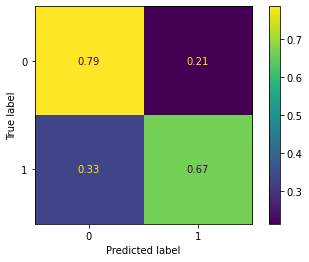

In [29]:
# Base model
clf = LogisticRegression(random_state=0, solver ='liblinear', max_iter=2000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation,  normalize='true')  
plt.show()

<i><u>Observation:</u></i> <br>
There is imbalance in classes which more correct classification for class 0 comparing to class 1. <br>
Since f1_score for train in lower than validation, the model is underfit -> not desiable<br>
Let add a balacing weight to see if there is any improvement in the performance

f1_score_train: 0.7176
f1_score_validation: 0.6997


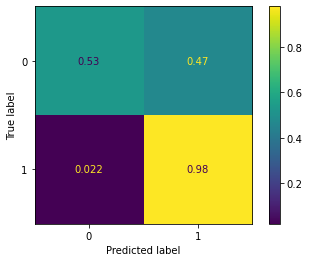

In [30]:
clf = LogisticRegression(random_state=0, class_weight='balanced', solver ='liblinear', 
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation, normalize='true')  
plt.show()

<i><u>Observation:</u></i> <br>
The performance does not improve when add balanced term and there are more correct classification in class 1 now comparing to the previous classification. The classification for both classes are still imbalanced. <br>
The performance gap between of validation and train is larger then before, and the model is overfit -> not desiable <br>
Since we aim for 0.75 for f1_score and the base model with unprocessed outliers gives only 0.699 for validation, we will need to improve the complexity of the model.

### Part B: K-fold cross validation

<b>Extract X and label for train

In [31]:
X_train = data.iloc[:, :-1]
Y_train = data.iloc[:,-1]

<b>Features scaling (min_max)

In [32]:
X_train_scaled = X_train.copy()

minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:10])
X_train_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:10])

<b>Train model and k-fold cross validation

In [33]:
f1_scorer = make_scorer(f1_score, average='macro')
clf = LogisticRegression( random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced')
scores = cross_validate(clf, X_train_scaled, Y_train.ravel(), scoring=f1_scorer, return_estimator=True,
                                                            return_train_score=True, cv=10)


In [34]:
best_classifier_inx = np.argmin(np.abs(scores['test_score'] - np.mean(scores['test_score'])))
print('Train_f1_score: {}'.format(scores['train_score'][best_classifier_inx]))
print('Validation_f1_score: {}'.format(scores['test_score'][best_classifier_inx]))

Train_f1_score: 0.7259905879618871
Validation_f1_score: 0.7101449275362319


<i><u>Observation:</u></i> <br>
The model is slightly overfit since f1 score train is greater than f1 score train. The performance slightly improved but not that much. 

### 2. Data with processed outliers

#### Part A: Holdout validaton

Extract Train and validation 

In [35]:
# split train and validation set
train_data, val_data = train_test_split(df, test_size=0.2, shuffle=True,random_state=0)
print("train data:", train_data.shape, "|", 'validation datata:',  val_data.shape)

train data: (479, 9) | validation datata: (120, 9)


In [36]:
 
# Train
X_train = train_data.iloc[:, 0:-1]
Y_train = train_data.iloc[:, -1]
 # Validation
X_validation = val_data.iloc[:, 0:-1]
Y_validation = val_data.iloc[:, -1]

min_max scaling

In [37]:

X_train_scaled = X_train.copy()
minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:10])
X_train_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:10])


X_validation_scaled = X_validation.copy()
minmaxscaler = MinMaxScaler().fit(X_validation_scaled.iloc[:, 0:10])
X_validation_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_validation.iloc[:, 0:10])


Inspecting the scaling

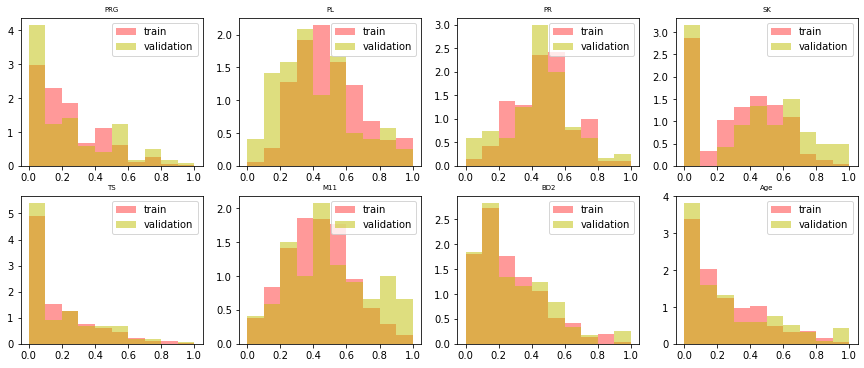

In [38]:
plt.figure(figsize=(15,6))
for i, col in enumerate(X_train.columns):
    plt.subplot(2,4, i+1)
    plt.hist(X_train_scaled[col], alpha= 0.4, color='red', density=True, bins=10)
    plt.hist(X_validation_scaled[col], alpha= 0.5, color='y', density=True, bins=10)
    plt.legend(['train', 'validation'])
    plt.title(col, size =7) 

<i><u>Observation:</u></i> <br> Train and validation sets are scaled to [0-1] sucessfully. Both data sets have similar distributions


f1_score_train: 0.7737
f1_score_validation: 0.6874


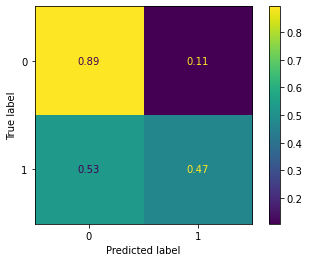

In [39]:
# Base model
clf = LogisticRegression(random_state=0, solver ='liblinear', max_iter=2000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation,  normalize='true')  
plt.show()

<i><u>Observation:</u></i> <br>
There is imbalance in classes which more correct classification for class 0 (0.89) comparing to class 1(0.47). <br>
Since f1_score for train(0.77) is greater than validation(0.68), the model is overfit by 0.1 <br>
Let add a balacing weight to see if there is any improvement in the performance.

f1_score_train: 0.7684
f1_score_validation: 0.7664


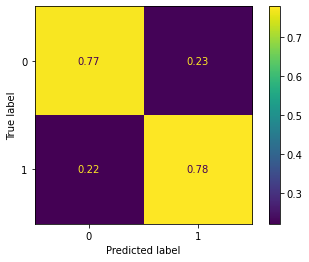

In [40]:
clf = LogisticRegression(random_state=0, class_weight='balanced', solver ='liblinear', 
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation, normalize='true')  
plt.show()

<i><u>Observation:</u></i><br>
Classification for both class is balanced when adding balance term<br>
Even though, f1_scores for train is reducing by only 0.01 comparing to the previous one.<br>
F1_scores for train and validation are similar which are above the expected F1_score(0.75)<br>
F1_score train is only 0.002 greater than f1 score validation. The performance gap is minimal here ->  desirable<br>



#### Part B: K-fold Cross Validation
<b>K=10 fold

Separate X, Y

In [41]:
X_train = df.iloc[:, :-1]
Y_train = df.iloc[:,-1]

Features scaling

In [42]:
X_train_scaled = X_train.copy()

minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:10])
X_train_scaled.iloc[:, 0:10] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:10])

Train model and k-fold validation

In [43]:
f1_scorer = make_scorer(f1_score, average='macro')
clf = LogisticRegression( random_state=0, solver='liblinear', max_iter=1000, class_weight='balanced')
scores = cross_validate(clf, X_train_scaled, Y_train.ravel(), scoring=f1_scorer, return_estimator=True,
                                                            return_train_score=True, cv=10)


In [44]:
best_classifier_inx = np.argmin(np.abs(scores['test_score'] - np.mean(scores['test_score'])))

In [45]:
print('Train_f1_score: {}'.format(scores['train_score'][best_classifier_inx].round(4)))
print('Validation_f1_score: {}'.format(scores['test_score'][best_classifier_inx].round(4)))

Train_f1_score: 0.7735
Validation_f1_score: 0.7689


<i><u>Observation:</u></i><br>
Train_f1_score is greater than Validation_f1_score 0.01. Train_f1_score is greater than 0.75 -> desirable

###  Conclusion for Experiment 1 (Linear Logistic Regression) 


<li>Using processed outliers data to train the model which led to better performance<br>
<li>The k-fold cross validation has better performance than holdout validation<br>
<li><i><b>Therefore, we will use data with proccessed outliers to train more complex models from here

# Experiment 2: Non-Linear Regression without Regularisation
using data with proccessed outliers for training
### Part A: Holdout Validation
<b> Extract train and validation data

In [46]:
# split train and validation set
train_data, val_data = train_test_split(df, test_size=0.2, shuffle=True,random_state=0)
print("train data:", train_data.shape, "|", 'validation datata:',  val_data.shape)

train data: (479, 9) | validation datata: (120, 9)


In [47]:

# Train
X_train = train_data.iloc[:, 0:-1]
Y_train = train_data.iloc[:, -1]
 # Validation
X_validation = val_data.iloc[:, 0:-1]
Y_validation = val_data.iloc[:, -1]

X_train_scaled = X_train.copy()
X_validation_scaled = X_validation.copy()

<b>Polynomial Features transformation

In [48]:
poly = PolynomialFeatures(2).fit(X_train_scaled)
X_train_scaled= pd.DataFrame(poly.transform(X_train_scaled))

poly = PolynomialFeatures(2).fit(X_validation_scaled)
X_validation_scaled = pd.DataFrame(poly.transform(X_validation_scaled))

<b>Min_max scaler

In [49]:
minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:,0:X_train_scaled.shape[1]])
X_train_scaled.iloc[:,0:X_train_scaled.shape[1]]= minmaxscaler.transform(X_train_scaled.iloc[:,0:X_train_scaled.shape[1]])

minmaxscaler = MinMaxScaler().fit(X_validation_scaled.iloc[:,0: X_validation_scaled.shape[1]])
X_validation_scaled.iloc[:,0:X_validation_scaled.shape[1]] = minmaxscaler.transform(X_validation_scaled.iloc[:,0: X_validation_scaled.shape[1]])

<b>Visualizing min_max scaling

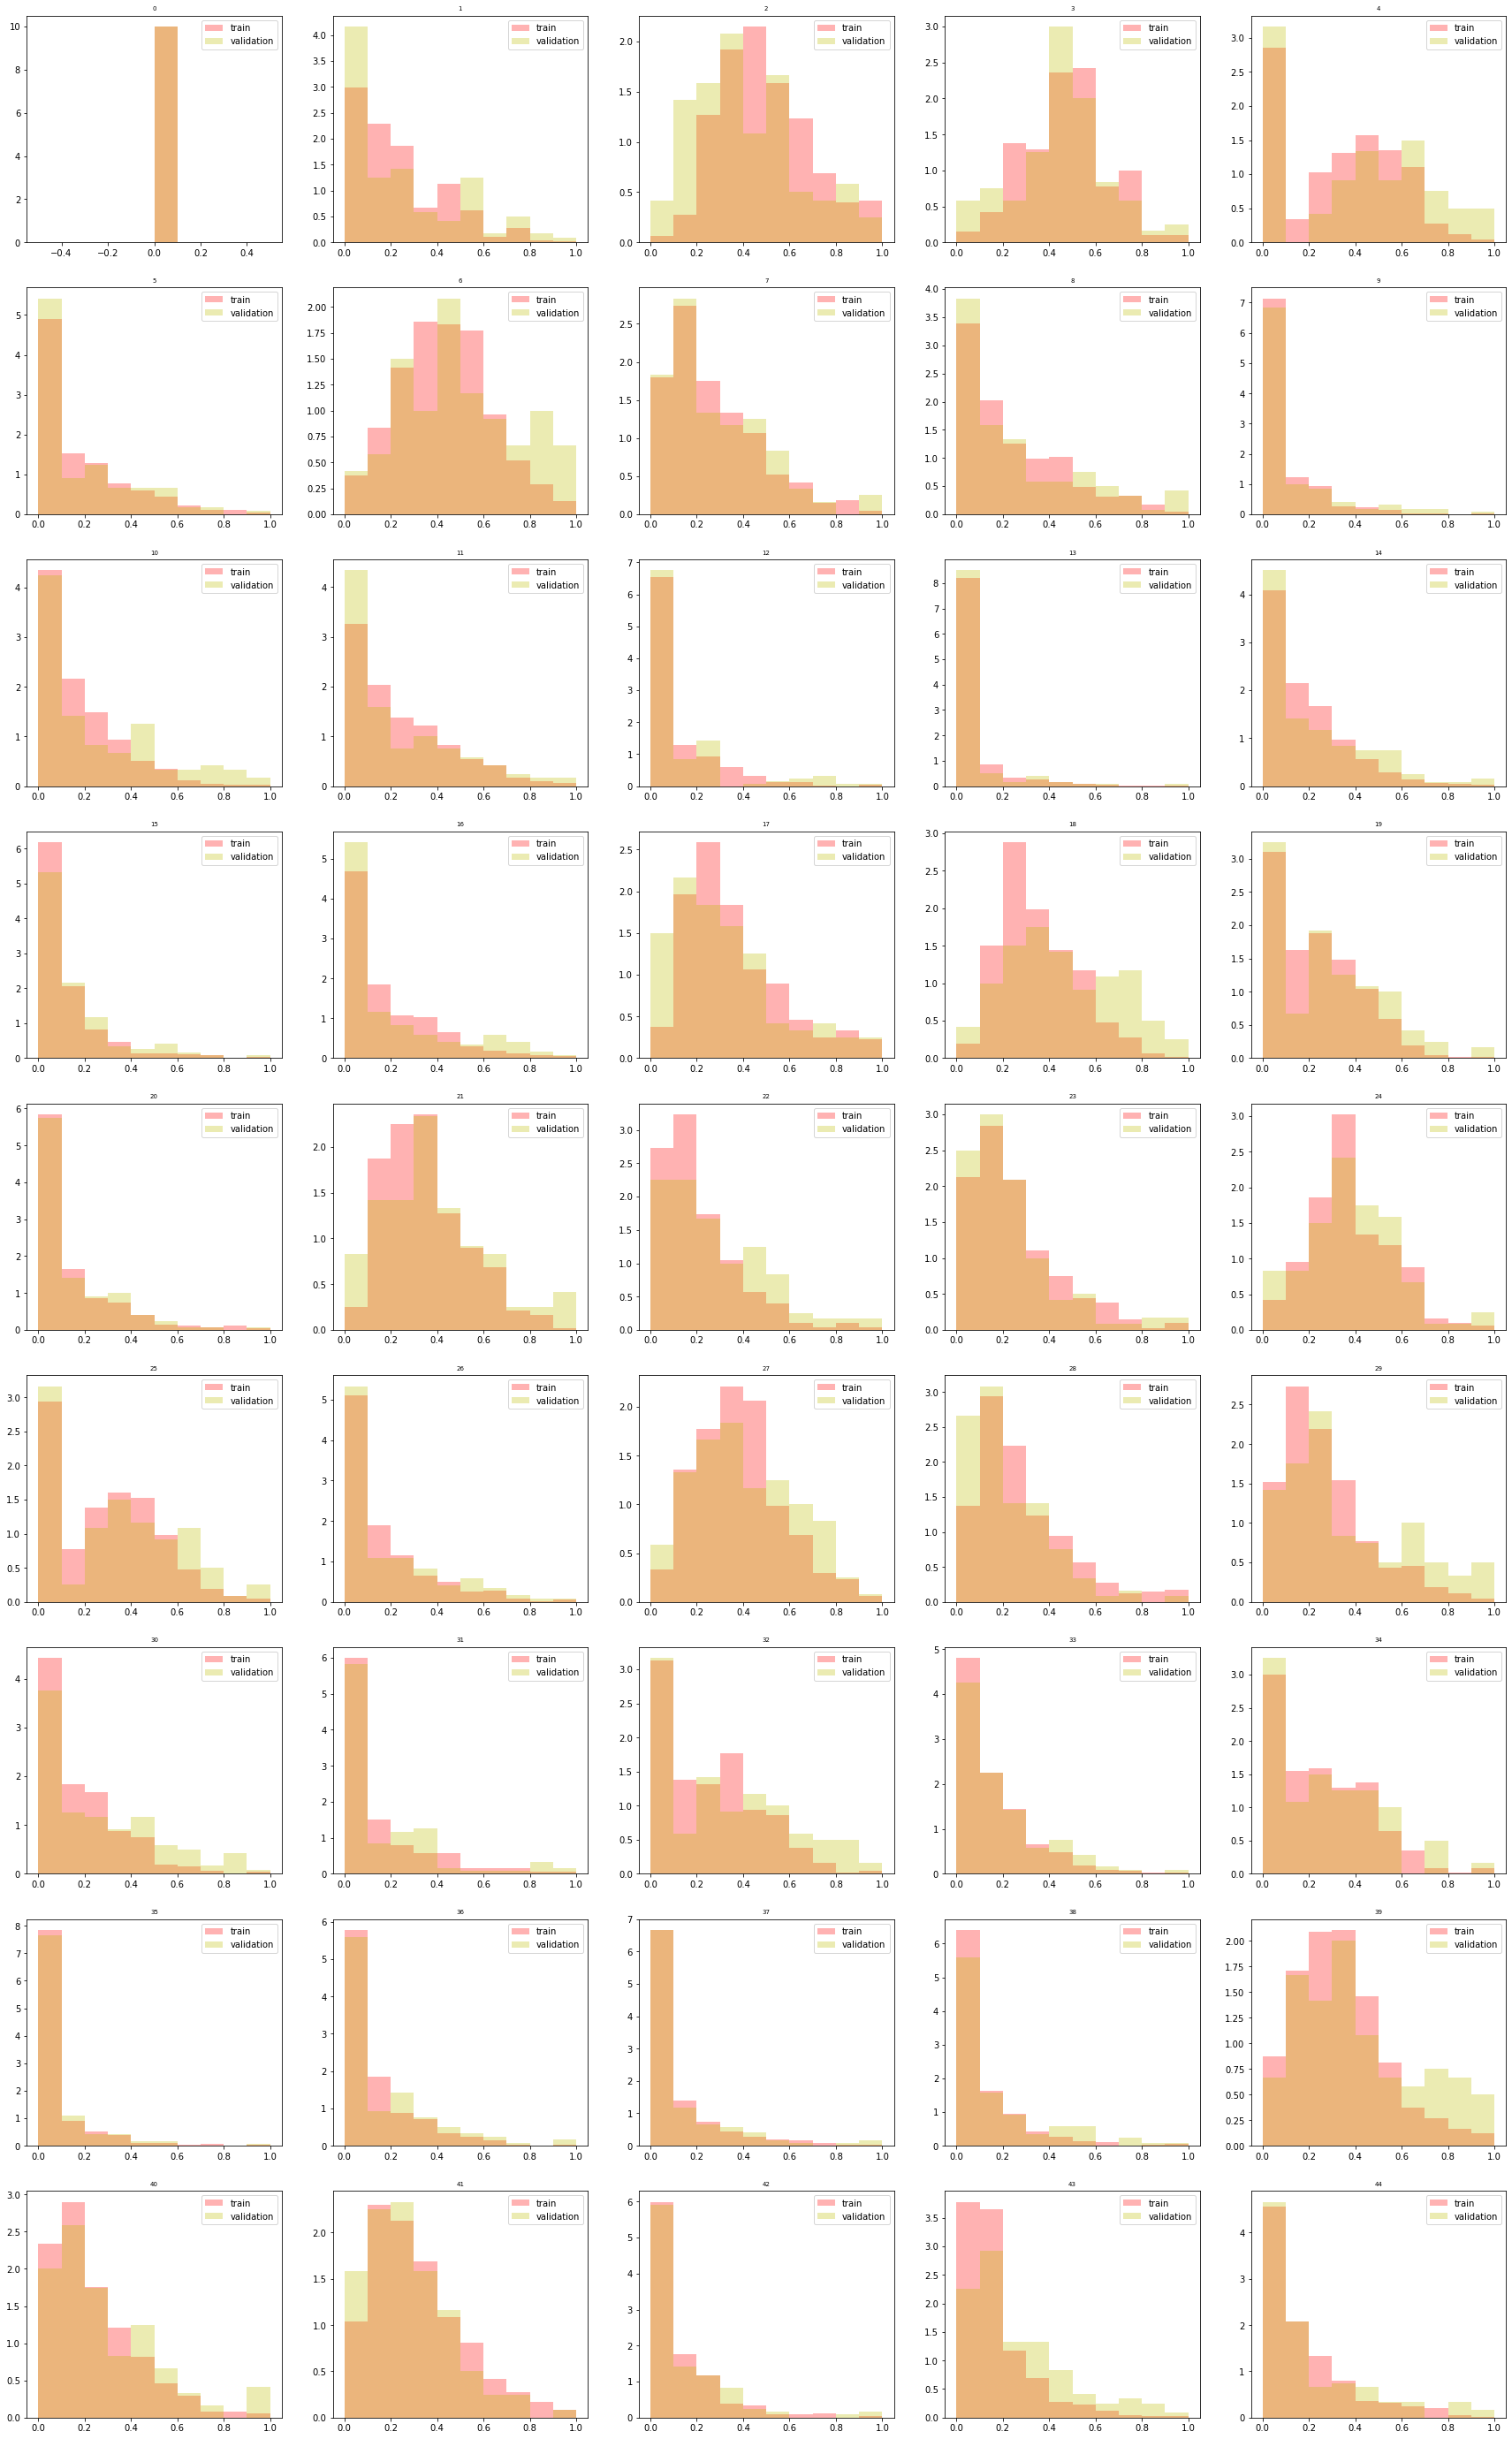

In [50]:
plt.figure(figsize=(30,50))
for i, col in enumerate(X_validation_scaled.columns):
    plt.subplot(9,5, i+1)
    plt.hist(X_train_scaled[col], alpha= 0.3, color='red', density=True, bins=10)
    plt.hist(X_validation_scaled[col], alpha= 0.3, color='y', density=True, bins=10)
    plt.legend(['train', 'validation'])
    plt.title(col, size =7) 

<i><u>Observation:</u></i><br>
Attributes are scalled to [0-1] <br>
train and validation set have similar distributions

<b>Train Model

f1_score_train: 0.7653
f1_score_validation: 0.7794


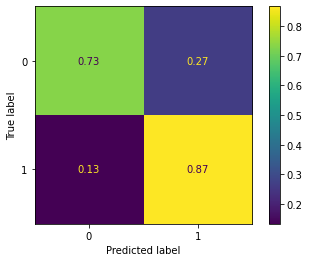

In [51]:
clf = LogisticRegression(random_state=0, class_weight='balanced', solver ='liblinear', 
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation, normalize='true')  
plt.show()

<i><u>Observation:</u></i><br>
Classification is balanced in both classes with the balance term. 0.73 correct classification for class 0 while class 1 has 0.87 correct classification.<br>
F1_score train is lesser than f1_score validation 0.01 which is slightly underfit ->undesirable

f1_score_train: 0.7701
f1_score_validation: 0.7917


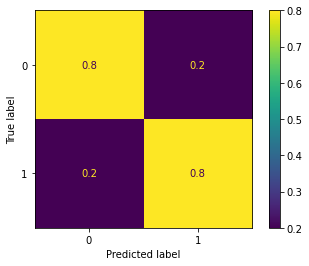

In [52]:
clf = LogisticRegression(random_state=0, class_weight='balanced', solver ='liblinear', penalty='l1',
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation, normalize='true')  
plt.show()

<i><u>Observation:</u></i><br>
With a penalty term at l1, both classed were correctly classified at the rate<br>
However, f1_score_validation is greater than f1_score_train which is slightly underfit -> undesirable
    

### Part B: K-fold Cross Validation

Extract X, Y

In [53]:
X_train = df.iloc[:, :-1]
Y_train = df.iloc[:,-1]
X_train_scaled = X_train.copy()

Features scaling and polynomial transformation

In [54]:
poly = PolynomialFeatures(2).fit(X_train_scaled)
X_train_scaled= pd.DataFrame(poly.transform(X_train_scaled))

minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]])
X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]])

In [55]:
f1_scorer = make_scorer(f1_score, average='macro')

clf = LogisticRegression( random_state=0, solver='liblinear', max_iter=1000,)
scores = cross_validate(clf, X_train_scaled, Y_train.ravel(), scoring=f1_scorer, return_estimator=True,
                                                            return_train_score=True, cv=10)

In [56]:
best_classifier_inx = np.argmin(np.abs(scores['test_score'] - np.mean(scores['test_score'])))

print('Train_f1_score: {}'.format(scores['train_score'][best_classifier_inx ].round(4)))
print('Validation_f1_score: {}'.format(scores['test_score'][best_classifier_inx].round(4)))

Train_f1_score: 0.7863
Validation_f1_score: 0.7851


<i><u>Observation:</u></i><br> F1 score for train and validation are very similar which the gap is 0.001 which is minimal. The performance is highest so far.

In [57]:
# get the model
clf = scores['estimator'][best_classifier_inx ]

In [58]:
# save model
dump(clf,'model.joblib')

['model.joblib']

### Conclusion for Experiment 2(Non-Linear Regression without Regularisation)

<li>Increasing the complexity of model does improve the performance in this case
<li>Using polynomial features at degree 2 with k-fold(10) cross validation have boosted the performance

# Experiment 3: Non-Linear Regression with Regularisation
Let see if Regularisation would improve the performance further?
### Part A: Holdout Validation
<b> Extract train and validation data

In [59]:
train_data, val_data = train_test_split(df, test_size=0.2, shuffle=True,random_state=0)

print("train:", train_data.shape)
print('validation:',  val_data.shape)

train: (479, 9)
validation: (120, 9)


In [60]:

# Train
X_train = train_data.iloc[:, 0:-1]
Y_train = train_data.iloc[:, -1]

 # Validation
X_validation = val_data.iloc[:, 0:-1]
Y_validation = val_data.iloc[:, -1]

X_train_scaled = X_train.copy()
X_validation_scaled = X_validation.copy()

<b>Transform data to Polynomial features

In [61]:
poly = PolynomialFeatures(2).fit(X_train_scaled)
X_train_scaled= pd.DataFrame(poly.transform(X_train_scaled))

poly = PolynomialFeatures(2).fit(X_validation_scaled)
X_validation_scaled = pd.DataFrame(poly.transform(X_validation_scaled))

<b>Feature Scaling (Min_max)

In [62]:
minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:,0:X_train_scaled.shape[1]])
X_train_scaled.iloc[:,0:X_train_scaled.shape[1]]= minmaxscaler.transform(X_train_scaled.iloc[:,0:X_train_scaled.shape[1]])

minmaxscaler = MinMaxScaler().fit(X_validation_scaled.iloc[:,0: X_validation_scaled.shape[1]])
X_validation_scaled.iloc[:,0:X_validation_scaled.shape[1]] = minmaxscaler.transform(X_validation_scaled.iloc[:,0: X_validation_scaled.shape[1]])

<b>Apply Regularisation</b><br>
Using Grid Search to find lambda

In [63]:
lambda_paras = np.logspace(-2, 1, num=15)    # establish the lambda values to test (grid)

# Then search
train_performance = list()
validation_performance = list()

for lam in lambda_paras:
    clf = LogisticRegression(random_state=0, C=1/lam, solver='liblinear',
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
    
    train_performance.append(train_f1)
    validation_performance.append(val_f1)

<b>Visualization the train performance and validation performance on the change of lamnda 

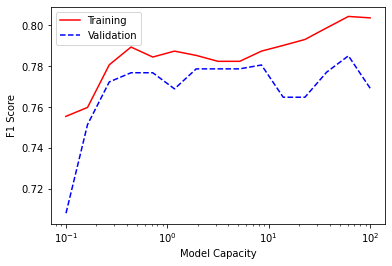

In [64]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performance], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in validation_performance], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [65]:
print('The best lamda is 61.054023')
pd.DataFrame(list(zip(train_performance,validation_performance, [1.0/l for l in lambda_paras])), 
             columns=['train','validation', 'lambda'])

The best lamda is 61.054023


,train,validation,lambda
0,0.8037,0.7692,100.000000
1,0.8044,0.7851,61.054023
2,0.7988,0.7771,37.275937
3,0.7931,0.7648,22.758459
4,0.7902,0.7648,13.894955
5,0.7874,0.7806,8.483429
6,0.7824,0.7787,5.179475
7,0.7824,0.7787,3.162278
8,0.7853,0.7787,1.930698
9,0.7874,0.7689,1.178769


f1_score_train: 0.8044
f1_score_validation: 0.7851


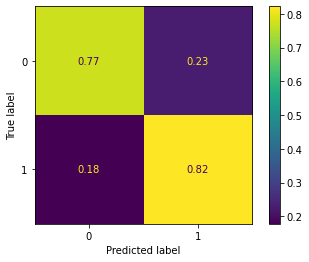

In [66]:
clf = LogisticRegression(random_state=0,  solver ='liblinear', C= 61.054023,
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())

f1_score_train, f1_score_validation = get_f1_scores(clf, X_train_scaled, Y_train, X_validation_scaled, Y_validation)
   
print('f1_score_train:', f1_score_train)
print('f1_score_validation:', f1_score_validation)
plot_confusion_matrix(clf, X_validation_scaled, Y_validation, normalize='true')  
plt.show()

<i><u>Observation:</u></i><br> 
The classification for both classes are quite balance with 0.77 correct classification for class 0 and 0.82 for class 1.<br>
f1_score_train is at 80.44 and f1 score validation at 78.51<br>
The model is overfit slightly with the gap at 0.019.

### Part B: K-fold Cross Validation
<b>K=10 fold

<b>Extract X and label for train

In [67]:
X_train = df.iloc[:, :-1]
Y_train = df.iloc[:,-1]
X_train_scaled = X_train.copy()

<b>Transform data to Polynomial features

In [68]:
poly = PolynomialFeatures(2).fit(X_train_scaled)
X_train_scaled= pd.DataFrame(poly.transform(X_train_scaled))


<b>Features scaling (min_max)

In [69]:
minmaxscaler = MinMaxScaler().fit(X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]])
X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]] = minmaxscaler.transform(X_train_scaled.iloc[:, 0:X_train_scaled.shape[1]])

<b>Train model and k-fold cross validation

In [70]:
f1_scorer = make_scorer(f1_score, average='macro')
lambda_paras = np.logspace(-5, 4, num=10)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(random_state=0, solver ='liblinear', C=1/lambda_para,
                         max_iter=1000).fit(X_train_scaled, Y_train.ravel())
    scores = cross_validate(clf, X_train_scaled, Y_train.ravel(), scoring=f1_scorer, return_estimator=True,
                                                            return_train_score=True, cv=10)
    
    cv_results[lambda_para] = scores

<b>Visualization the train performance and validation performance on the change of lambda

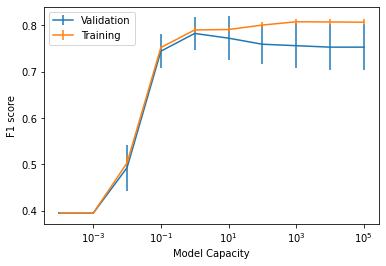

In [71]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]
val_std = [np.std(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]
train_std = [np.std(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('F1 score')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

In [72]:
cv_results.keys()

dict_keys([1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0])

In [73]:
# the best lamda is 0.1, according to the above graph
# we choose the split which has the closet performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1]['test_score'] - np.mean(cv_results[0.1]['test_score'])))
print("The best classifier split index:" ,best_classifier_inx )
print("Train performance:", cv_results[0.1]['train_score'][best_classifier_inx].round(4))   
print("Validation performance:", cv_results[0.1]['test_score'][best_classifier_inx].round(4))                                  

The best classifier split index: 3
Train performance: 0.792
Validation performance: 0.7689


<i><u>Observation:</u></i><br> The performances for both sets are decreasing with k-fold validation comparing to the hold out technique. <br>
    The model is slightly overfit with the gap of performance is 0.03

### Conclusion for experiment 3

The regularisation did not boost up performance. Performance of validation is the same with hold out validation and decreased in k-fold validation                                                                                          

# 4. Ultimate Judgment 

<li>With 3 experiments , We have narrow down the the non-linear without regularisation by cross validation(logistic Regression).
<li>Since The regularisation did not boost up performance. Performance of validation is the same with hold out validation and decreased in k-fold validation, we will choose the simpler model
<li>the the non-linear without regularisation by cross validation This model has f1_score for train set at 0.7863 and validation set at 0.7851.

# 5. Prediction

In [74]:
# load model
clf = load('model.joblib')

In [75]:
# load test
test = pd.read_csv('Paitients_Files_Test.csv')
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [76]:
test.shape

(169, 10)

In [77]:
test_scaled = test.drop(['ID', 'Insurance'], axis=1).copy()
# scale test 
poly = PolynomialFeatures(2).fit(test_scaled)
test_scaled= pd.DataFrame(poly.transform(test_scaled))

minmaxscaler = MinMaxScaler().fit(test_scaled.iloc[:,0:test_scaled.shape[1]])
test_scaled.iloc[:,0:test_scaled.shape[1]]= minmaxscaler.transform(test_scaled.iloc[:,0:test_scaled.shape[1]])

In [78]:
# predict
test_pred = clf.predict(test_scaled)

In [79]:
# add predicted label to data frame
test['Sepsis'] = test_pred

In [80]:
# change 0 to 'Negative'
condition_class_0 = test['Sepsis'] == 0
test.loc[condition_class_0, 'Sepsis'] = 'Negative'

In [81]:
# change 1 to 'Positive'
condition_class_1 = test['Sepsis'] == 1
test.loc[condition_class_1  , 'Sepsis']  = 'Positive'

In [82]:
# export to csv
test.loc[:, ["ID", 'Sepsis']].to_csv('s3828276_predictions.csv', index=False)